In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [3]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x00000189213C9A80>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [5]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x00000189213908B0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [6]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.44751894 0.21200703 0.08845692]
 [0.32351338 0.24573735 0.64401825]]

tensor([[0.0165, 0.2279, 0.8560],
        [0.2199, 0.8271, 0.7782]])


In [7]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.66205671 0.0821012  0.76526178]
 [0.8274459  0.55263165 0.3728339 ]]

tensor([[0.0424, 0.6974, 0.3238],
        [0.7834, 0.7361, 0.9764]])


In [8]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.20251222 0.58293519]
 [0.85977281 0.53266202]]

tensor([[0.2025, 0.5829],
        [0.8598, 0.5327]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.20251222 0.58293519]
 [0.85977281 0.53266202]]



In [9]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

print("{}--{}\n".format(tensor.view(9).shape, tensor.view(9)))

print("Addition: {}\n".format(torch.add(tensor,tensor)))

print("Subtraction: {}\n".format(tensor.sub(tensor)))

print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))


print("Element wise division: {}\n".format(torch.div(tensor,tensor)))


tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])--tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0


In [10]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

In [ ]:
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


In [12]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
train = pd.read_csv(r"train.csv",dtype = np.float32)


In [14]:
targets_numpy = train.label.values
targets_numpy

array([1., 0., 1., ..., 7., 6., 9.], shape=(42000,), dtype=float32)

In [17]:
feature_numpy = train.loc[:, train.columns != "label"].values / 255

In [16]:
feature_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(42000, 784), dtype=float32)

In [19]:
features_train, features_test, targets_train, targets_test = train_test_split(feature_numpy, targets_numpy, test_size = 0.2, random_state = 42)

In [37]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(featuresTrain) / batch_size)
num_epochs = int(num_epochs)
print('num_epochs: {}'.format(num_epochs))

trian = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)








num_epochs: 29


In [38]:
trian_loader = DataLoader(dataset = trian, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(dataset = test, batch_size = batch_size, shuffle = False)










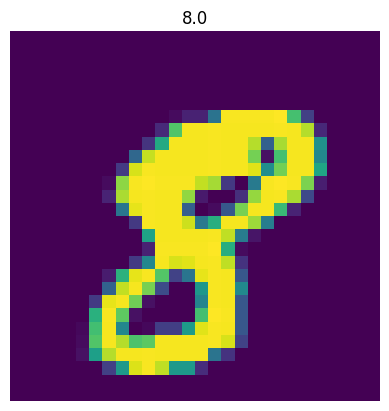

In [39]:
plt.imshow(feature_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [40]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegressionModel(input_dim=28*28, output_dim=10)



error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


model.parameters()





<generator object Module.parameters at 0x000001895216D9A0>

In [41]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
print('num_epochs: {}'.format(num_epochs))
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trian_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

num_epochs: 29
Iteration: 500  Loss: 1.8157622814178467  Accuracy: 66.63095092773438%
Iteration: 1000  Loss: 1.6077629327774048  Accuracy: 75.0952377319336%
Iteration: 1500  Loss: 1.2959938049316406  Accuracy: 77.94047546386719%
Iteration: 2000  Loss: 1.2130640745162964  Accuracy: 79.63095092773438%
Iteration: 2500  Loss: 1.035719633102417  Accuracy: 80.83333587646484%
Iteration: 3000  Loss: 0.942941427230835  Accuracy: 81.75%
Iteration: 3500  Loss: 0.8997929096221924  Accuracy: 82.38095092773438%
Iteration: 4000  Loss: 0.748491108417511  Accuracy: 82.89286041259766%
Iteration: 4500  Loss: 0.9768815040588379  Accuracy: 83.44047546386719%
Iteration: 5000  Loss: 0.7973506450653076  Accuracy: 83.76190185546875%
Iteration: 5500  Loss: 0.7509477734565735  Accuracy: 84.19047546386719%
Iteration: 6000  Loss: 0.8714340329170227  Accuracy: 84.61904907226562%
Iteration: 6500  Loss: 0.6579304337501526  Accuracy: 84.78571319580078%
Iteration: 7000  Loss: 0.7082140445709229  Accuracy: 84.9523773193